# The goal of this notebook is to replicate Phenomizer results in the paper "Wikidata as a FAIR knowledge graph for the life sciences"
Notes: <br>
1) Set up a python virual environment and make sure required softwares are installed. You can do do this in terminal by running `pip install -r requirements.txt` <br>
* Wikidata integrator: https://github.com/SuLab/WikidataIntegrator <br>
* Requirements: https://github.com/SuLab/Wikidata-phenomizer/blob/master/Replicating_Phenomizer_Results/requirements.txt <br>

2) Download "Wikidata_phenomizer_input_modifier.py" from github link: <br>
* Python script: https://github.com/SuLab/Wikidata-phenomizer/Replicating_Phenomizer_Results/Wikidata_phenomizer_input_modifier.py <br>


3) Install BOQA: https://github.com/sulab/boqa <br>

4) Download hpo.obo files (you can do that in this notebook)<br>
5) Download phenotype_annotation.tab files (you can do this in this notebook)

### The following steps are done to manipulate the data for BOQA analysis:
* Download `hpo.obo` and `phenotype_annotation.tab` files.
* Generate `phenotype_annotation_wd.tab` files (essentially `phenotype_annotation.tab` files with wikidata items appended at the end).
* Rename each file `DBname` to those found in build 1266. (Makes analysis more consistent).
* Run BOQA
* Extract text from BOQA
* Graph!

#### Import libraries required.

In [1]:
import os
import pandas as pd

#### Downloading the annotation_files and obo_files.

In [2]:
!pwd

/home/rogertu/Phenomizer


In [3]:
# create a directory to download annotation files to.
!mkdir _annotation_files
os.chdir("_annotation_files")

#### Download `phenotype_annotation.tab` builds from human phenotype ontology Jenkin's servers.

In [4]:
# From Jenkins, Download all `phenotype_annotation.tab` files
phenotype_annotation_ls = ['1266','1265','1264','1263','1262',
                           '1259','1254','1252','1249','1248',
                           '1246','1241','1239','1237']

for a_file in phenotype_annotation_ls:
    curCount = phenotype_annotation_ls.index(a_file) # gets index from the list
    fileName = "http://compbio.charite.de/jenkins/job/hpo.annotations/" + a_file +"/artifact/misc/phenotype_annotation.tab"
    !wget $fileName -q
    reName = 'pa_b' + phenotype_annotation_ls[curCount] + ".tab"
    !mv phenotype_annotation.tab $reName

#### Change out (up) of this directory, create a new directory, and change into (down) that directory.

In [5]:
# Get out of current directory, create a new directory, change into the new directory.
os.chdir("..")
!mkdir _obo_files
os.chdir("_obo_files")

#### Download old `hpo.obo` builds from Bioportal into the newly created folder.

In [6]:
# From Bioportal, download `hp.obo` files
obo_ls = ['577','576','575','574','573',
          '572','571','570','569','568',
          '567','566','564', '563']

for a_file in obo_ls:
    curCount = obo_ls.index(a_file) # gets index from the list
    fileName = "http://data.bioontology.org/ontologies/HP/submissions/" + a_file + "/download?apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb"
    !wget $fileName -q
    reName = 'hp_b' + phenotype_annotation_ls[curCount] + ".obo"
    !mv download?apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb $reName


#### Fix phenotype_annotation.tab builds 1248, 1249, 1252 and 1254 because they have extra columns...

In [7]:
#  fix build 1248, 1249, 1252 and 1254 because it has 15 columns vs 14 (why?!?!)
os.chdir("..")
os.chdir("_annotation_files")

In [8]:
# read to a dictionary, manipulate files with pandas

toFix = ['b1248', 'b1249', 'b1252', 'b1254']
toFix_dict = dict()

for item in toFix:
    key = item
    value = pd.read_csv("pa_" + item + ".tab", header = None, sep = "\t")
    toFix_dict.update({key:value})
    

/home/rogertu/Phenomizer/Phen_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,7,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#*If you want to visualize the dataframe before column switching, convert this from markdown → code.* <br>
`for item in toFix:
    display(toFix_dict[item].head())`

In [9]:
for item in toFix:
    display(toFix_dict[item].head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0000252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
1,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001249,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
2,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001250,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
3,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
4,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001518,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0000252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
1,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001249,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
2,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001250,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
3,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
4,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001518,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0000252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
1,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001249,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
2,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001250,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
3,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
4,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001518,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0000252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
1,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001249,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
2,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001250,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
3,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN
4,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001518,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,2013-05-29,HPO:skoehler,NaN


In [10]:
# Concatenate col 13 and 12 as 'cat', remove col 13 and 12, and reorder indices.
for item in toFix:
    df = toFix_dict[item]
    df['cat'] = df[13] + "[" + df[12] + "]"
    del df[12]
    del df[13]
    value = df[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,'cat' , 14]]
    toFix_dict.update({item:value})

#*If you want to visualize the dataframe after column switching.* <br>

` for item in toFix:
    display(toFix_dict[item].head()) `

In [11]:
for item in toFix:
    display(toFix_dict[item].head())

,0,1,2,3,4,5,6,7,8,9,10,11,cat,14
0,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0000252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
1,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001249,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
2,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001250,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
3,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
4,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001518,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN


,0,1,2,3,4,5,6,7,8,9,10,11,cat,14
0,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0000252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
1,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001249,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
2,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001250,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
3,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
4,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001518,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN


,0,1,2,3,4,5,6,7,8,9,10,11,cat,14
0,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0000252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
1,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001249,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
2,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001250,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
3,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
4,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001518,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN


,0,1,2,3,4,5,6,7,8,9,10,11,cat,14
0,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0000252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
1,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001249,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
2,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001250,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
3,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001252,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN
4,DECIPHER,1,Wolf-Hirschhorn Syndrome,NaN,HP:0001518,DECIPHER:1,IEA,NaN,NaN,NaN,O,WOLF-HIRSCHHORN SYNDROME,HPO:skoehler[2013-05-29],NaN


In [12]:
# Export merged files.
for item in toFix:
    df = toFix_dict[item]
    df.to_csv("pa_" + item + ".tab", sep = '\t', header = None)

#### Congrats! You've downloaded the both the datasets and fixed the files that had too many columns.  
Next we'll explore utilizing Phenomizer.  Phenomizer (Su Lab) is a program that takes a `phenotype_annotation.tab` file, queries wikidata for all OMIM entries and appends them to the phenotype_annotation,  and returns the file as a `phenotype_annotation_wd.tab` file.

#### Get `Wikidata_phenomizer_input_modifier.py` from github to the folder that holding your `_annotation_files`

In [13]:
!wget https://raw.githubusercontent.com/turoger/Wikidata-phenomizer/master/Replicating_Phenomizer_Results/Wikidata_phenomizer_input_modifier.py

--2019-10-09 17:52:08--  https://raw.githubusercontent.com/turoger/Wikidata-phenomizer/master/Replicating_Phenomizer_Results/Wikidata_phenomizer_input_modifier.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.196.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.196.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3742 (3.7K) [text/plain]
Saving to: ‘Wikidata_phenomizer_input_modifier.py’

Wikidata_phenomizer 100%[===================>]   3.65K  --.-KB/s    in 0s      

2019-10-09 17:52:09 (58.0 MB/s) - ‘Wikidata_phenomizer_input_modifier.py’ saved [3742/3742]



In [14]:
!pwd

/home/rogertu/Phenomizer/_annotation_files


#### Run phenomizer to generate wikidata + HPO `_wd.tab` files.

In [15]:
for item in os.listdir():
    if item.endswith(".tab"):
        !python3 Wikidata_phenomizer_input_modifier.py $item

/home/rogertu/Phenomizer/Phen_env/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
number of hpo annotations: 131600
number of wikidata annotations: 418
number overlap annotations: 3200

top unique disease-phenotypes in wd:
NGLY1-deficiency                                                                                                                                                                                                                                                                                                                                                                                         70
lung cancer                                                                                          

/home/rogertu/Phenomizer/Phen_env/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
number of hpo annotations: 160275
number of wikidata annotations: 418
number overlap annotations: 274

top unique disease-phenotypes in wd:
#615273 CONGENITAL DISORDER OF GLYCOSYLATION, TYPE Iv; CDG1V;;CDG Iv; CDGIv                                                                                                                                                                                                                                                                                                                              68
lung cancer                                                                                           

/home/rogertu/Phenomizer/Phen_env/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
number of hpo annotations: 150177
number of wikidata annotations: 418
number overlap annotations: 252

top unique disease-phenotypes in wd:
#615273 CONGENITAL DISORDER OF GLYCOSYLATION, TYPE Iv; CDG1V;;CDG Iv; CDGIv                                                                                                                                                                                                                                                                                                                              70
lung cancer                                                                                           

/home/rogertu/Phenomizer/Phen_env/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
number of hpo annotations: 158239
number of wikidata annotations: 418
number overlap annotations: 274

top unique disease-phenotypes in wd:
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG                                                                                                                                                                                                                                                                                                                                                             68
lung cancer                                                                                           

/home/rogertu/Phenomizer/Phen_env/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
number of hpo annotations: 145453
number of wikidata annotations: 418
number overlap annotations: 3175

top unique disease-phenotypes in wd:
CONGENITAL DISORDER OF DEGLYCOSYLATION                                                                                                                                                                                                                                                                                                                                                                   70
lung cancer                                                                                          

/home/rogertu/Phenomizer/Phen_env/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
number of hpo annotations: 159162
number of wikidata annotations: 418
number overlap annotations: 283

top unique disease-phenotypes in wd:
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG                                                                                                                                                                                                                                                                                                                                                             68
lung cancer                                                                                           

/home/rogertu/Phenomizer/Phen_env/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
number of hpo annotations: 128603
number of wikidata annotations: 418
number overlap annotations: 3253

top unique disease-phenotypes in wd:
#615273 CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG;;CONGENITAL DISORDER OF GLYCOSYLATION, TYPE Iv; CDG1V;;CDG Iv; CDGIv                                                                              63
lung cancer                                                                                                                                                                                            28
Parkinson disease                                                                            

In [16]:
!ls *_wd.tab

pa_b1237_wd.tab  pa_b1248_wd.tab  pa_b1259_wd.tab  pa_b1265_wd.tab
pa_b1239_wd.tab  pa_b1249_wd.tab  pa_b1262_wd.tab  pa_b1266_wd.tab
pa_b1241_wd.tab  pa_b1252_wd.tab  pa_b1263_wd.tab
pa_b1246_wd.tab  pa_b1254_wd.tab  pa_b1264_wd.tab


#### Next, change all names in each file to that of build 1266. If you don't do this, the naming is inconsistent between each build over time, which gives erroneous results in BOQA.

In [17]:
#  Column labels
tab_colnames = ['DB', 'DB_Object_ID', 'DB_Name', 'Qualifier', 'HPO_ID', 'DB_Reference',
                'Evidence_Code', 'Onset modifier', 'Frequency', 'Sex', 'Modifier',
                'Aspect', 'Date_Created', 'Assigned_By']

In [19]:
# Import items into a dictionary for unmodified files and wdmodified files
unmod_ls = []
unmod_dict = dict()
disease_label = dict()

wdmod_ls = []
wdmod_dict = dict()

for item in os.listdir():
    
    if not item.endswith("_wd.tab") and item.startswith("pa"):
        unmod_ls.append(item)
        value = pd.read_csv(item, delimiter = "\t", names=tab_colnames, dtype=str)
        unmod_dict.update({item:value})
        disease_label.update({item:dict(zip(value.DB_Reference, value.DB_Name))})
    
    elif item.endswith("_wd.tab") and item.startswith("pa"):
        wdmod_ls.append(item)
        value = pd.read_csv(item, delimiter = "\t", names=tab_colnames, dtype=str)
        wdmod_dict.update({item:value})

In [20]:
# Change labels for unmodified and wd modified files to build 1266
# Takes generated dictionary in previous(pd_dict), and change all names to labels found in b1266.

b1266_unmod_dict = dict()
b1266_wdmod_dict = dict()
for item in unmod_ls:
    df = unmod_dict[item]
    df['DB_Name_hpo'] = df.DB_Reference.map(disease_label["pa_b1266.tab"].get)
    df['DB_Name'] = df.DB_Name_hpo.combine_first(df.DB_Name)
    b1266_unmod_dict.update({item:df})
    
for item in wdmod_ls:
    df = wdmod_dict[item]
    df['DB_Name_hpo'] = df.DB_Reference.map(disease_label["pa_b1266.tab"].get)
    df['DB_Name'] = df.DB_Name_hpo.combine_first(df.DB_Name)
    b1266_wdmod_dict.update({item:df})

In [21]:
# Export files named appropriately

for item in unmod_ls:
    df = b1266_unmod_dict[item]
    df[tab_colnames].to_csv(item, sep="\t", header=False, index=False)
    
for item in wdmod_ls:
    df = b1266_wdmod_dict[item]
    df[tab_colnames].to_csv(item, sep="\t", header=False, index=False)

#### Run BOQA on unmodified and modified files.

In [22]:
# Run BOQA for each set
hpo_ids="HP:0001263,HP:0001252,HP:0000522,HP:0012804,HP:0000559,HP:0011968,HP:0009830,HP:0001265,HP:0002167,HP:0000970,HP:0040129"
os.chdir("/home/rogertu/Phenomizer/boqa/") # Note, you need to change into the directory you installed boqa in
!pwd


/home/rogertu/Phenomizer/boqa


In [23]:
# First create adict to map your keys to obo files
obo_Path = "/home/rogertu/Phenomizer/_obo_files/"         # Note, you need to pick where your obo_files are
ann_Path = "/home/rogertu/Phenomizer/_annotation_files/"  # Note, you need to pick where your annotation_tab files are
annobo_Dict = dict()

for fname in os.listdir(ann_Path):
    if fname.startswith("pa") and not fname.endswith("_wd.tab"):
        splitted = fname.split(".")
        name = splitted[0]
        annobo_Val = obo_Path + "hp_" + name[3:8] + ".obo"
        annobo_Key = ann_Path + fname
        
        annobo_Dict.update({annobo_Key:annobo_Val})

#*check if your dictionary is mapped properly. You'd want your `ann_Path:obo_Path` id's to match correspondingly.* <br>

```annobo_Dict```

In [24]:
# Create dictionary for obo files with "_wd"
annobo_Dict2 = dict()

for fname in os.listdir(ann_Path):
    if fname.endswith("_wd.tab"):
        splitted = fname.split(".")
        name = splitted[0]
        annobo_Val = obo_Path + "hp_" + name[3:8] +".obo"
        annobo_Key = ann_Path + fname
    

        annobo_Dict2.update({annobo_Key:annobo_Val})

#*check if your dictionary is mapped properly. You'd want your `ann_Path2:obo_Path` id's to match correspondingly.* <br>

```annobo_Dict2```

#### Run BOQA on Unmodified and Wdmodified files, pipe the standard out and error to a text file.

In [25]:
# BOQA Unmodified, pipe output to a file named unmod.txt
directory = ann_Path

for filename in sorted(os.listdir(directory)):

    if filename.startswith("pa") and not filename.endswith("_wd.tab"): 
        print(filename)
        filePath = os.path.join(directory, filename)
        filePathStr = ('"'+filePath+'"')               # Takes path obtained, adds quotes
        hp_obo = (annobo_Dict[filePath])               # Pass a Key into annobo_Dict, recieve a value and add quotes
        
        # make sure you choose the right path to output your result text files.
        runThis = !java -jar target/boqa-0.0.3-SNAPSHOT.jar -hpo {hpo_ids} -obo {hp_obo} -af {filePathStr} -n 10 &>> /home/rogertu/Phenomizer/_annotation_files/unmod.txt
        runThis
        continue
    
    else:
        continue

pa_b1237.tab
pa_b1239.tab
pa_b1241.tab
pa_b1246.tab
pa_b1248.tab
pa_b1249.tab
pa_b1252.tab
pa_b1254.tab
pa_b1259.tab
pa_b1262.tab
pa_b1263.tab
pa_b1264.tab
pa_b1265.tab
pa_b1266.tab


In [26]:
# BOQA WDmodified, pipe output to a file named wdmod.txt
directory = ann_Path

for filename in sorted(os.listdir(directory)):

    if filename.startswith("pa") and filename.endswith("_wd.tab"): # Note the removal of `not`
        print(filename)
        filePath = os.path.join(directory, filename)
        filePathStr = ('"'+filePath+'"')               # Takes path obtained, adds quotes
        hp_obo = (annobo_Dict2[filePath])              # Pass a Key into annobo_Dict, recieve a value and add quotes

        runThis = !java -jar target/boqa-0.0.3-SNAPSHOT.jar -hpo {hpo_ids} -obo {hp_obo} -af {filePathStr} -n 25 &>> /home/rogertu/Phenomizer/_annotation_files/wdmod.txt
        runThis
        continue
    
    else:
        continue

pa_b1237_wd.tab
pa_b1239_wd.tab
pa_b1241_wd.tab
pa_b1246_wd.tab
pa_b1248_wd.tab
pa_b1249_wd.tab
pa_b1252_wd.tab
pa_b1254_wd.tab
pa_b1259_wd.tab
pa_b1262_wd.tab
pa_b1263_wd.tab
pa_b1264_wd.tab
pa_b1265_wd.tab
pa_b1266_wd.tab


#### Text processing of the BOQA outputs for the raw and the Wikidata-modified phenotype_annotation.tab files.

In [27]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
os.chdir("/home/rogertu/Phenomizer/_annotation_files/")

#### Get indices of where `itemName|score` is located in the unmodified BOQA outputs.

In [29]:
unmod = open("unmod.txt", "r")

itemName_indices = []
for index, line in enumerate(unmod):
    if line == "itemName|score\n":
        itemName_indices.append(index)
        
itemName_indices

[4067,
 8145,
 12229,
 16313,
 20391,
 24469,
 28547,
 30925,
 33303,
 35733,
 38355,
 40793,
 43223,
 45557]

In [30]:
# length? 
len(itemName_indices)

14

#### For every index in `itemName_indices`, look 10 lines down for CDDG. If it exists, create an item in a dictionary to build and value.

In [31]:
unmod = open("unmod.txt", "r")
unmod_ls = unmod.readlines()
build_ls = ['b1237','b1239','b1241','b1246','b1248',
            'b1249','b1252','b1254','b1259','b1262',
            'b1263','b1264','b1265','b1266']
res_un = dict()

for line in unmod_ls:
    split = line.split(sep="|")   # returns a list of two, name and % semantic similarity
    f_ind = unmod_ls.index(line)  # computes the index of the line in the file is
    
    if split[0] == "CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)":

        for index in itemName_indices:
            withn = range(index,index+10)                       # computes the index range file line should fall in.
            buildName = build_ls[itemName_indices.index(index)] # returns the name of build from build list.

            if f_ind in withn:
                val = split[1]                                  # fix the % semantic similarity from string to float.
                val = val.strip('\n')                           #
                val = float(val)                                # 
                res_un.update({buildName:val})                  # Update dictionary with build and % semantic similarity
                print(buildName)
                print(line)

b1241
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.13222605766200135

b1246
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.13163654580120396

b1248
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.13468054869009333

b1249
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.14825745555847192

b1252
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.14473728630088692

b1254
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.1115729099754877

b1259
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.10695366023475644

b1262
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.35724875360237396

b1263
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.35746508599626475

b1264
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.3482354901598477

b1265
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.3458454767346629

b1266
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:

#### Do the same thing for wikidata modified BOQA results.
* Create an index for `itemName|score`.
* Look for CDDG, store build and value to a dictionary.

In [32]:
wdmod = open("wdmod.txt", "r")

itemName_indices2 = []
for index, line in enumerate(wdmod):
    if line == "itemName|score\n":
        itemName_indices2.append(index)

In [33]:
len(itemName_indices2)

14

In [34]:
wdmod = open("wdmod.txt", "r")
wdmod_ls = wdmod.readlines()

res_wd = dict()

for line in wdmod_ls:
    split = line.split(sep="|")   # returns a list of two, name and % semantic similarity
    f_ind = wdmod_ls.index(line)  # computes the index of the line in the file is
    
    if split[0] == "CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)":

        for index in itemName_indices2:
            withn = range(index,index+10)                       # computes the index range file line should fall in.
            buildName = build_ls[itemName_indices2.index(index)]# returns the name of build from build list.

            if f_ind in withn:
                val = split[1]                                  # fix the % semantic similarity from string to float.
                val = val.strip('\n')                           #
                val = float(val)                                # 
                res_wd.update({buildName:val})                  # Update dictionary with build and % semantic similarity
                print(buildName)
                print(line)

b1237
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.17160357887114772

b1239
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.17110371199145843

b1241
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.3356842848618296

b1246
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.34719783567372703

b1248
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.37075900318274746

b1249
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.39493342004768245

b1252
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.3949371882443358

b1254
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.3949349034867903

b1259
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.39493723518214785

b1262
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.3828069035818584

b1263
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:615273)|0.38281125834105606

b1264
CONGENITAL DISORDER OF DEGLYCOSYLATION; CDDG (OMIM:6

#### Print both dictionaries to see if the values match

In [35]:
res_un

{'b1241': 0.13222605766200135,
 'b1246': 0.13163654580120396,
 'b1248': 0.13468054869009333,
 'b1249': 0.14825745555847192,
 'b1252': 0.14473728630088692,
 'b1254': 0.1115729099754877,
 'b1259': 0.10695366023475644,
 'b1262': 0.35724875360237396,
 'b1263': 0.35746508599626475,
 'b1264': 0.3482354901598477,
 'b1265': 0.3458454767346629,
 'b1266': 0.32071617741247055}

In [36]:
res_wd

{'b1237': 0.17160357887114772,
 'b1239': 0.17110371199145843,
 'b1241': 0.3356842848618296,
 'b1246': 0.34719783567372703,
 'b1248': 0.37075900318274746,
 'b1249': 0.39493342004768245,
 'b1252': 0.3949371882443358,
 'b1254': 0.3949349034867903,
 'b1259': 0.39493723518214785,
 'b1262': 0.3828069035818584,
 'b1263': 0.38281125834105606,
 'b1264': 0.40537283847675226,
 'b1265': 0.4053704040700968,
 'b1266': 0.40534408678088857}

#### Create date object for builds 1237 to 1266.

In [37]:
date_ls = ['2017/03/09','2017/04/14','2017/06/30','2017/10/06', '2017/12/12',
           '2018/01/26','2018/03/09','2018/06/13','2018/07/27', '2018/10/09',
           '2018/12/21','2019/02/12','2019/04/15','2019/06/03']
date_ls = pd.to_datetime(date_ls)

In [38]:
date_ls

DatetimeIndex(['2017-03-09', '2017-04-14', '2017-06-30', '2017-10-06',
               '2017-12-12', '2018-01-26', '2018-03-09', '2018-06-13',
               '2018-07-27', '2018-10-09', '2018-12-21', '2019-02-12',
               '2019-04-15', '2019-06-03'],
              dtype='datetime64[ns]', freq=None)

#### Create a list from the dictionaries, that way you can create a pandas dataframe.

In [39]:
# pushing results from the untransformed and wd into a list to create a pandas df.
res_un_ls = []
for name in build_ls:
    if name in res_un.keys():
        res_un_ls.append(res_un[name])
    else:
        res_un_ls.append(0)
        

In [40]:
res_wd_ls = []
for name in build_ls:
    if name in res_wd.keys():
        res_wd_ls.append(res_wd[name])
    else:
        res_wd_ls.append(0)

#### Construct your dataframe

In [41]:
data = {'build':build_ls, 'date':date_ls, 'HPO':res_un_ls, 'HPO + Wikidata':res_wd_ls}
res = pd.DataFrame.from_dict(data)

In [42]:
res

,build,date,HPO,HPO + Wikidata
0,b1237,2017-03-09,0.000000,0.171604
1,b1239,2017-04-14,0.000000,0.171104
2,b1241,2017-06-30,0.132226,0.335684
3,b1246,2017-10-06,0.131637,0.347198
4,b1248,2017-12-12,0.134681,0.370759
5,b1249,2018-01-26,0.148257,0.394933
6,b1252,2018-03-09,0.144737,0.394937
7,b1254,2018-06-13,0.111573,0.394935
8,b1259,2018-07-27,0.106954,0.394937
9,b1262,2018-10-09,0.357249,0.382807


In [43]:
# Gotta melt your dataframe
res_melt = pd.melt(res, id_vars= ["build", "date"], value_vars=["HPO","HPO + Wikidata"])

In [44]:
res_melt

,build,date,variable,value
0,b1237,2017-03-09,HPO,0.000000
1,b1239,2017-04-14,HPO,0.000000
2,b1241,2017-06-30,HPO,0.132226
3,b1246,2017-10-06,HPO,0.131637
4,b1248,2017-12-12,HPO,0.134681
5,b1249,2018-01-26,HPO,0.148257
6,b1252,2018-03-09,HPO,0.144737
7,b1254,2018-06-13,HPO,0.111573
8,b1259,2018-07-27,HPO,0.106954
9,b1262,2018-10-09,HPO,0.357249


## Plot your data

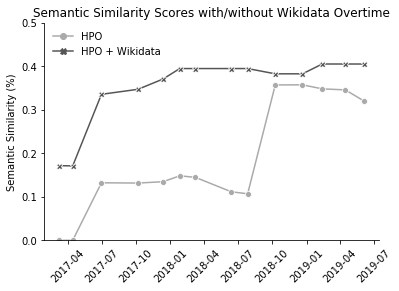

In [45]:
ax2 = sns.lineplot(x = "date", y = "value", hue = "variable", style = "variable", data = res_melt,
                   markers = True, dashes=False, palette = "binary")

ax2.set(ylim=(0,0.5))
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Semantic Similarity (%)')
plt.title('Semantic Similarity Scores with/without Wikidata Overtime')

#Removes Top and Right borders.
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#Removing legend title and frame.
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles = handles[1:], labels=labels[1:], loc = "upper left", frameon=False)

This plot demonstrates the calculated semantic simlarity for the disease "Congenital Disorder of Deglycosylation" from the Bayesian Ontology Query Algorithm when fed with only the phenotype_annotation.tab dataset, provided by HPO, or the same phenotype_annotation.tab dataset supplemented with Wikidata.  This algorithm integrates knowledge stored in an ontology (hpo.obo) and accompanying annotations (phenotype_annotation.tab) in a Bayesian network and searches for terms of the ontology to get a list of the best matching diseases.  (Bauer, Kohler et al PMID: 22843981).  The Human Phenotype terms that were searched for came from Caglayan and Komu et al (PMID: 25220016).

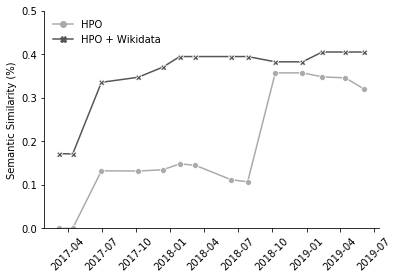

<Figure size 9000x6000 with 0 Axes>

In [46]:
ax2 = sns.lineplot(x = "date", y = "value", hue = "variable", style = "variable", data = res_melt,
                   markers = True, dashes=False, palette = "binary")

ax2.set(ylim=(0,0.5))
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Semantic Similarity (%)')
plt.title('')
plt.figure(figsize=[9,6],dpi = 1000)
#Removes Top and Right borders.
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#Removing legend title and frame.
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles = handles[1:], labels=labels[1:], loc = "upper left", frameon=False)

#Export
ax2.figure.savefig('/home/rogertu/Phenomizer/Sem_sim_scores.svg',format = 'svg', bbox_inches='tight', dpi = 500)
